[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/crunchdao/quant-venture-capital-resources/blob/main/xgboost.ipynb)

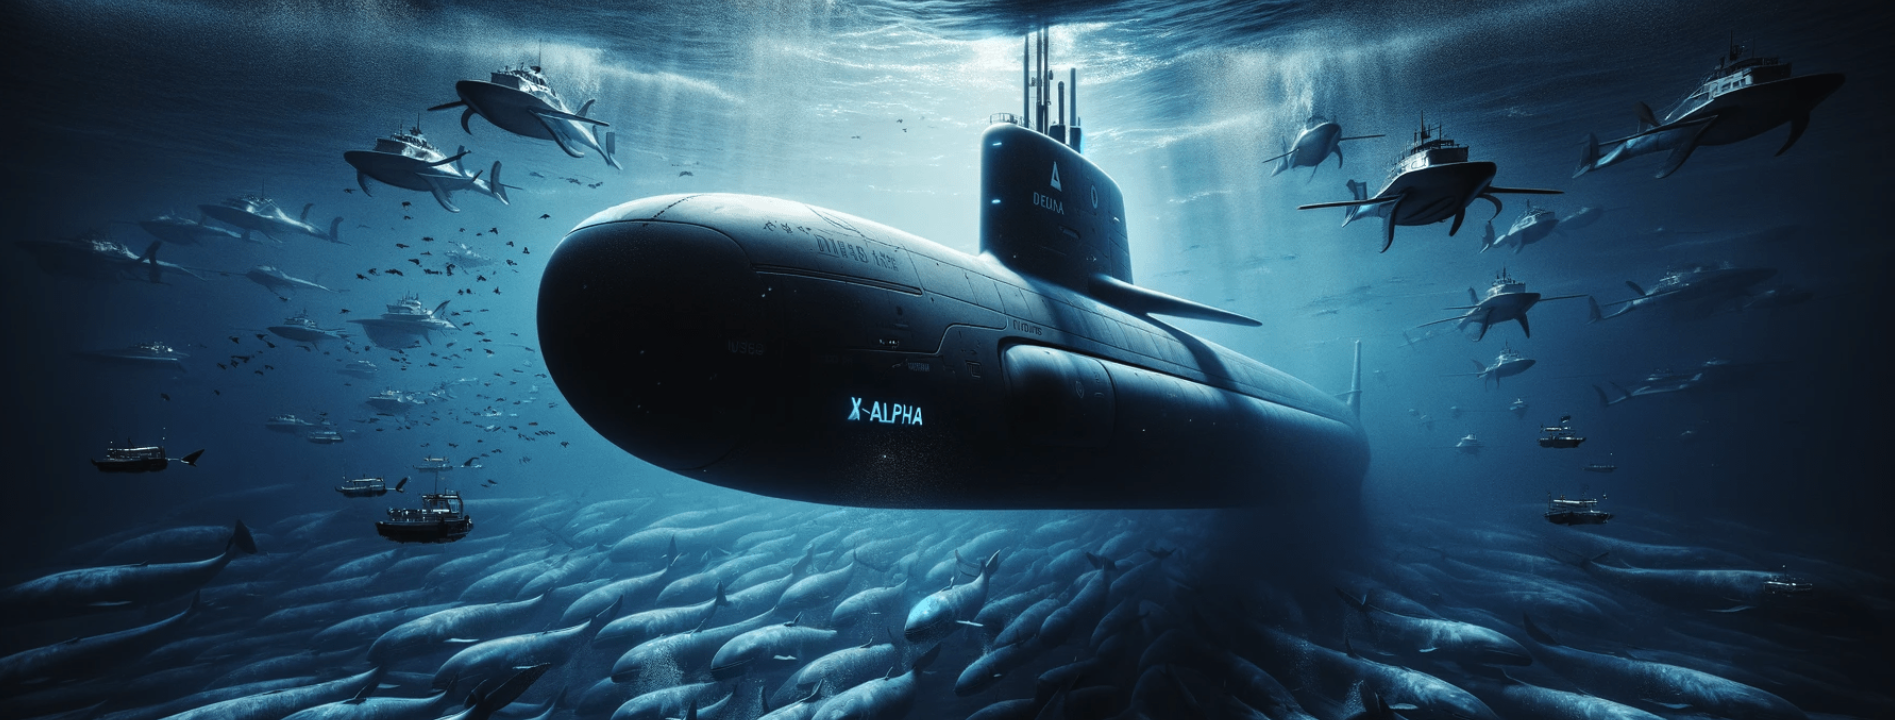


![image](https://github.com/crunchdao/quant-venture-capital-resources/assets/39467268/5d51b530-06bc-4b76-9c9a-180b28bd7295)


# Set up your crunch workspace

#### STEP 1
Run this cell to install the crunch library in your workspace.
This command will create a crunch-cli folder in your workspace.

In [1]:
# Grab the following command here: https://hub.crunchdao.com/competitions/venture-capital-portfolio-prediction/submit/via/notebook
%pip install crunch-cli --upgrade 
!crunch setup venture-capital-portfolio-prediction . --token NEaIJ8gaHO6P9e4TbLVmbVvKHsntJ61eIKj2Yb52wPWY2OFXhyYvkGddsWEv4pmZ --force

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Attempting uninstall: crunch-cli
    Found existing installation: crunch-cli 2.0.0b2
    Uninstalling crunch-cli-2.0.0b2:
      Successfully uninstalled crunch-cli-2.0.0b2
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to 

#### STEP 2
Import the crunch package and instantiate it to be able to access its functionality.

In [2]:
import crunch
crunch = crunch.load_notebook(__name__)

loaded inline runner with module: <module '__main__'>


# X-ALPHA Venture Capital Portfolio Rally

## Submission Phase - 4 Weeks:

- You can submit your solution in the form of either a notebook or a Python script.
- Test your code using the provided test command.
- There is No public leaderboard; [Cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)) is your best friend.

## Data

In [3]:
import pandas as pd
# Getting the data
X_train, y_train, X_test = crunch.load_data()

download data/X_train.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/24/X_train.parquet
already exists: file length match
download data/y_train.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/24/y_train.parquet
already exists: file length match
download data/X_test.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/24/X_test_reduced.parquet
already exists: file length match
download data/y_test.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/24/y_test_reduced.parquet
already exists: file length match


In [4]:
display(X_train) # training data = 35 dates

,date,id,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229
0,0,0,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2,0,0,0,0,0,0,0.0,0.0,...,11.6,10.14,9.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,3,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,4,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,5,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.71,9.31,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662756,35,5318586,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2662757,35,5318588,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2662758,35,5318590,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.33,1.24,0.0,0.0,0.0,0.0
2662759,35,5318591,0,0,0,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
display(y_train) # training label: target_r3

,date,id,target_r3
0,0,0,0
1,0,2,0
2,0,3,0
3,0,4,0
4,0,5,0
...,...,...,...
2662756,35,5318586,0
2662757,35,5318588,0
2662758,35,5318590,0
2662759,35,5318591,0


## Coding Guidelines

Your submission needs to provide at least three components: imports, `train()`, and `infer()`.

1. **Imports:** As with any script, if your solution contains dependencies on external packages, make sure to import them. The system will automatically install your dependencies. Make sure that you are only using packages that are whitelisted [here](https://hub.crunchdao.com/competitions/venture-capital-portfolio-prediction/submit).

2. **`train()`:** In the training phase, users will build the model and train it so that it can perform inferences on the testing data. The model must be saved in the `resources` directory.

3. **`infer()`:** In the inference function, the model trained in the previous step will be loaded and used to perform inferences on a data sample matching the characteristics of the training set.


# Xgboost Example Submission

### Submission Process

1. Ensure that all the code necessary to run your submission is called by either the `train()`, `infer()`, or both functions. The system will parse these functions to execute them in the cloud.

2. Once satisfied with your work, download and submit your notebook (File -> Download -> Download.ipynb).

3. Upload this notebook on [CrunchDAO's Venture Capital Submission page](https://hub.crunchdao.com/competitions/venture-capital-portfolio-prediction/submit).

In [6]:
# Imports
import sklearn
import typing
import joblib

import xgboost as xgb
import pandas as pd
import numpy as np

from pathlib import Path
from scipy.stats import spearmanr

def train(X_train: pd.DataFrame, y_train: pd.DataFrame, model_directory_path: str = "resources") -> None:
    """
    Train an XGBoost model on the quantitative vc dataset and save it.

    Args:
        X_train: DataFrame with training features.
        y_train: DataFrame with training labels.
        model_directory_path: Path to save the trained model.

    Returns:
        None
    """
    
    # Create DMatrix objects for XGBoost
    dtrain = xgb.DMatrix(X_train.iloc[:, 2:], label=y_train.iloc[:, 2:], enable_categorical=True)
    
    # Define XGBoost model with 'binary:logitraw' objective 
    params_logitraw = {
        "objective": "binary:logitraw",
        "eval_metric": "logloss",
        "eta": 0.3,
        "max_depth": 3
    }

    # Train the model
    model_logitraw = xgb.train(params_logitraw, dtrain, num_boost_round=10)
    
    # Save the trained model in the specified directory
    model_pathname = Path(model_directory_path) / "model.joblib"
    print(f"Saving model in {model_pathname}")
    joblib.dump(model_logitraw, model_pathname)


def infer(X_test: pd.DataFrame, model_directory_path: str = "resources") -> pd.DataFrame:
    """
    Use the trained XGBoost model to make predictions on Out-Of-Sample data.

    Args:
        model_directory_path: Path to the directory containing the trained model.
        X_test: DataFrame with features for inference.

    Returns:
        DataFrame with inferences (date, id, value).
    """

    # Above this threshold, the startup would be classified as 1; below it, it will be classified as 0
    threshold = 0.5
    
    # Load the trained model saved by the train function
    model = joblib.load(Path(model_directory_path) / "model.joblib")

    # Create a DataFrame with date, id, and predicted target values
    dtest = xgb.DMatrix(X_test.iloc[:, 2:])
    y_test_predicted = X_test[["date", "id"]].copy()
    y_test_predicted["target_r3"] = model.predict(dtest)
    
    # Apply threshold for binary predictions
    probs_logitraw = 1 / (1 + np.exp(-y_test_predicted["target_r3"]))
    y_test_predicted["target_r3"] = (probs_logitraw > threshold).astype(int)  

    return y_test_predicted

def temporal_train_test_split(X_train_loc, y_train_loc, test_size=0.2):
    """
    Perform temporal train-test split on the quantitative vc data.

    Args:
        X_train_loc: DataFrame with training features.
        y_train_loc: DataFrame with training labels.
        test_size: Percentage of data to be used for testing.

    Returns:
        X_train_local, X_test_local, y_train_local, y_test_local
    """
    unique_dates = X_train_loc.date.unique()
    split_date = unique_dates[int(len(unique_dates)*(1 - test_size))]
    X_train_local = X_train_loc[X_train_loc['date'] <= split_date]
    X_test_local = X_train_loc[X_train_loc['date'] > split_date]
    
    y_train_local = y_train_loc[y_train_loc['date'] <= split_date]
    y_test_local = y_train_loc[y_train_loc['date'] > split_date]
    
    return X_train_local, X_test_local, y_train_local, y_test_local


In [7]:
# Getting the data
X_train, y_train, X_test = crunch.load_data()

# Splitting the data
print("Splitting (X_train, y_train) in X_train_local, X_test_local, y_train_local, y_test_local")
X_train_local, X_test_local, y_train_local, y_test_local = temporal_train_test_split(
    X_train,
    y_train,
    test_size=0.2
)

download data/X_train.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/24/X_train.parquet
already exists: file length match
download data/y_train.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/24/y_train.parquet
already exists: file length match
download data/X_test.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/24/X_test_reduced.parquet
already exists: file length match
download data/y_test.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/24/y_test_reduced.parquet
already exists: file length match
Splitting (X_train, y_train) in X_train_local, X_test_local, y_train_local, y_test_local


In [8]:
# Training. It may require a few minutes.
train(X_train_local, y_train_local)

Saving model in resources/model.joblib


In [9]:
print("Inference")
y_test_local_pred = infer(X_test_local, model_directory_path="resources")

Inference


Number of selected startup = 407 over 827068 = 0.05%


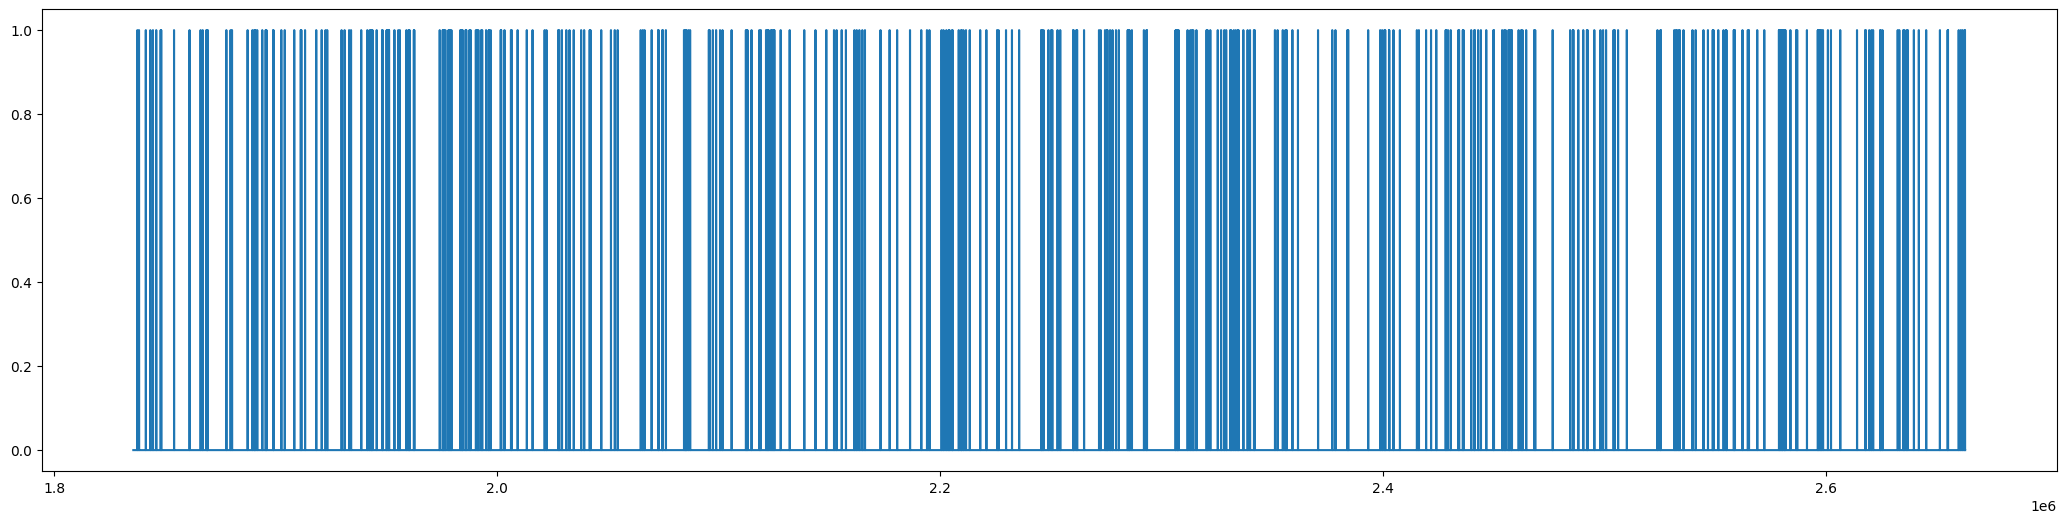

In [10]:
y_test_local_pred.target_r3.plot(figsize=(26, 6))
print(f"Number of selected startup = {y_test_local_pred.target_r3.sum()} over {len(y_test_local_pred)} = {round((y_test_local_pred.target_r3.sum()/len(y_test_local_pred)), 4)*100}%")

# Testing Your Submission Locally

You can use the `crunch` package's function to run your code locally, simulating the same execution process as in the cloud (i.e., one date at a time). If it runs without any issues locally, it is highly likely that there won't be problems when executing it on the CrunchDAO's system in the cloud.

Setting `force_first_train=True` means that your model will be trained on the first date of the test set.

In [11]:
print("Remove unused data to release memory")
del X_train, y_train, X_test, X_train_local, X_test_local, y_train_local, y_test_local

Remove unused data to release memory


In [12]:
crunch.test(force_first_train=True)

17:34:53 no forbidden library found
17:34:53 
17:34:53 running local test
17:34:53 internet access isn't restricted, no check will be done
17:34:53 


download data/X_train.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/24/X_train.parquet
already exists: file length match
download data/y_train.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/24/y_train.parquet
already exists: file length match
download data/X_test.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/24/X_test_reduced.parquet
already exists: file length match
download data/y_test.parquet from https://crunchdao--competition--production.s3.eu-west-1.amazonaws.com/data-releases/24/y_test_reduced.parquet
already exists: file length match


17:35:19 ---
17:35:19 loop: moon=36 train=True (1/2)
17:35:19 call: train


Saving model in resources/model.joblib


17:41:26 call: infer
17:41:32 ---
17:41:32 loop: moon=37 train=True (2/2)
17:41:32 call: train


Saving model in resources/model.joblib


17:46:40 call: infer
17:46:47 prediction_path=data/prediction.csv
17:46:47 duration: time=00:11:53
17:46:47 memory: before="269.41 MB" after="357.06 MB" consumed="87.64 MB"
17:46:47 local test succesfully run!


,date,id,target_r3
0,36,5318593,0
1,36,5318595,0
2,36,5318596,0
3,36,5318601,0
4,36,5318602,0
...,...,...,...
123514,37,5810904,0
123515,37,5810907,0
123516,37,5810908,0
123517,37,5810909,0


# Remember to download and submit this notebook to https://hub.crunchdao.com/competitions/venture-capital-portfolio-prediction/submit